## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Bishop, Pattern Recognition and ML

In [102]:
import matplotlib.pyplot as plt
import numpy as np

In [103]:
img  = plt.imread("./elephant.jpg")

In [104]:
img.shape

(330, 500, 3)

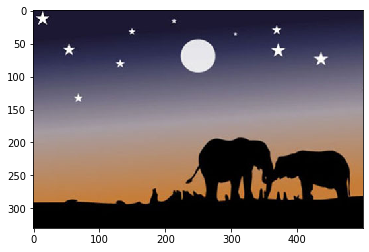

In [105]:
plt.imshow(img)
plt.show()

In [106]:
img.shape

(330, 500, 3)

In [123]:
all_pixels = img.reshape((-1, 3))

In [124]:
all_pixels.shape

(165000, 3)

In [125]:
from sklearn.cluster import KMeans

In [127]:
km = KMeans(n_clusters= 20)

In [128]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [129]:
centers = km.cluster_centers_.astype("uint8")

In [130]:
centers

array([[ 28,  24,  52],
       [166, 154, 158],
       [ 65,  66,  98],
       [  1,   0,   1],
       [120, 115, 135],
       [197, 126,  60],
       [233, 232, 237],
       [172, 149, 140],
       [ 84,  83, 110],
       [ 37,  36,  69],
       [184, 137, 100],
       [151, 143, 154],
       [ 93,  61,  36],
       [144, 100,  62],
       [103,  99, 122],
       [ 48,  27,  13],
       [137, 130, 144],
       [179, 143, 119],
       [ 49,  49,  85],
       [191, 131,  79]], dtype=uint8)

## Plot dominant colors

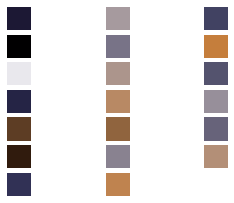

In [131]:
i = 1

plt.figure(figsize=(5,5))

for each_color in centers:
    plt.subplot(10, 3, i)
    i+=1
    plt.axis("off")
    
    
    a = np.zeros((100,100, 3), dtype="uint8")
    a[:, :, :] = each_color
    plt.imshow(a)
    
plt.show()

# Segmenting Original Image

In [132]:
new_img = np.zeros(img.shape, dtype="uint8").reshape((-1, 3))

In [133]:
new_img.shape

(165000, 3)

In [134]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [135]:
all_pixels

array([[23, 19, 46],
       [25, 21, 48],
       [28, 24, 51],
       ...,
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0]], dtype=uint8)

In [136]:
# assign most dominating color according to group it belongs
for ix in range(new_img.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

In [137]:
new_img  =  new_img.reshape(img.shape)

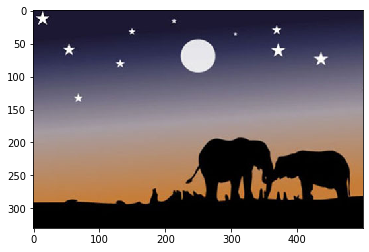

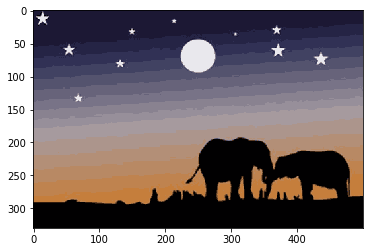

In [138]:
plt.imshow(img)
plt.show()
plt.imshow(new_img)
plt.show()